<a href="https://colab.research.google.com/github/satyam362/Iris-analysis/blob/main/iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

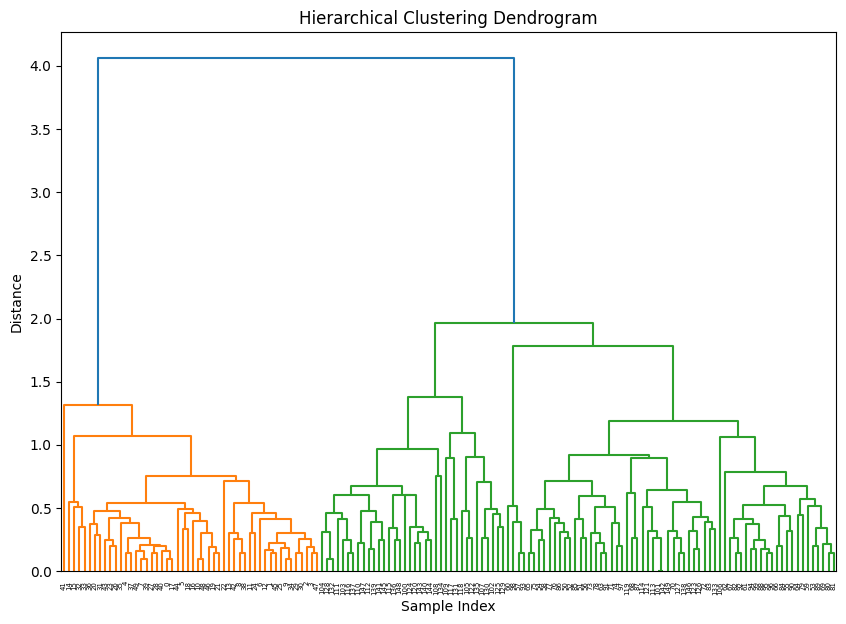

Cluster labels for k=2:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Cluster labels for k=4:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 3 4 2 4 2 2 2 2 4 2 2 2 2
 2 2 4 4 2 2 2 2 4 2 4 2 4 2 2 4 4 2 2 2 2 2 4 2 2 2 2 4 2 2 2 4 2 2 2 4 2
 2 4]


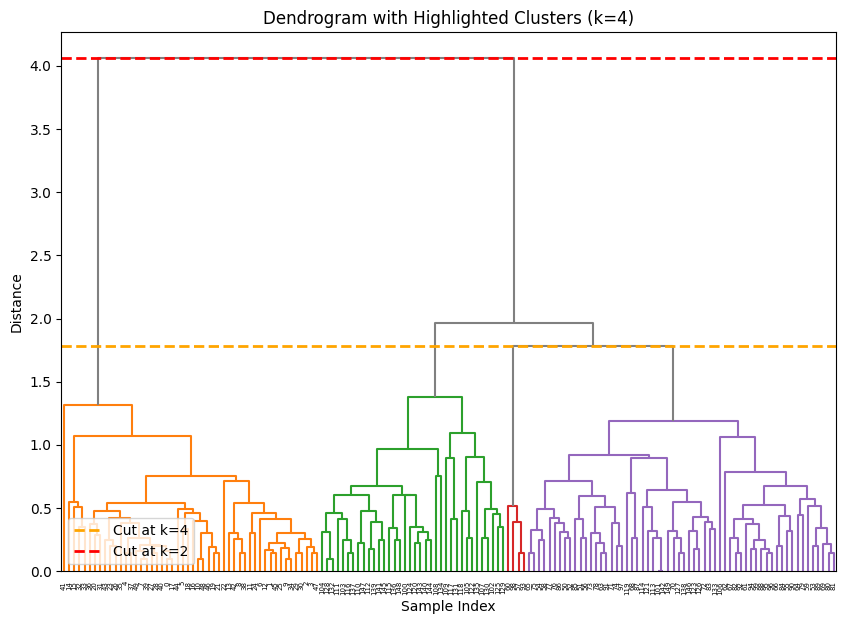

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Step 1: Load the Iris Dataset
# The Iris dataset is a classic dataset for machine learning and statistical analysis.
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Remove the species column as in the original R script.
# Here, the species column is not present initially in the sklearn dataset version.

# Step 2: Calculate the Distance Matrix
# Compute the Euclidean distance matrix between rows (samples) of the dataset.
distance_matrix = pdist(iris_data, metric='euclidean')

# Step 3: Perform Hierarchical Clustering
# Perform hierarchical/agglomerative clustering using the 'average' linkage method.
linkage_matrix = linkage(distance_matrix, method='average')

# Step 4: Visualize the Dendrogram
# Plot the dendrogram to visualize the clustering hierarchy.
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Step 5: Cut the Dendrogram to Form Clusters
# Create cluster labels for the data by cutting the dendrogram at a specified number of clusters.
# This is equivalent to the `cutree` function in R.
clusters_k2 = fcluster(linkage_matrix, 2, criterion='maxclust')  # Create 2 clusters
clusters_k4 = fcluster(linkage_matrix, 4, criterion='maxclust')  # Create 4 clusters

# Print cluster labels
print("Cluster labels for k=2:")
print(clusters_k2)
print("Cluster labels for k=4:")
print(clusters_k4)

# Step 6: Highlight Clusters on the Dendrogram
# Re-plot the dendrogram and highlight clusters with different colors (simulating `rect.hclust` in R).
plt.figure(figsize=(10, 7))
dendrogram(
    linkage_matrix,
    color_threshold=linkage_matrix[-(4-1), 2],  # Color threshold for 4 clusters
    above_threshold_color='gray'
)
plt.title("Dendrogram with Highlighted Clusters (k=4)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.axhline(y=linkage_matrix[-(4-1), 2], c='orange', lw=2, linestyle='--', label='Cut at k=4')
plt.axhline(y=linkage_matrix[-(2-1), 2], c='red', lw=2, linestyle='--', label='Cut at k=2')
plt.legend()
plt.show()